Fluorescence Traces
==========

From this tutorial, you will learn: 

1. Making single cell fluorescence traces

## Getting Started

Be sure you've installed the *Allen SDK Package*.

If you haven't, follow this link: [Allen SDK Package Installation](http://localhost:8000/beginners/installation/)

## Import Libraries

Let's begin by importing the necessary libraries. They are as follows: 
* **BrainObservatoryCache** contains functions for accessing and parsing our data
* **pyplot** is a MATLAB-like plotting framework
* **pprint** for formatting our data, making it easy to read
* **pandas** a data analysis library 

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from matplotlib import pyplot as plt
import pprint 
import pandas as pd

# 1. Making Single Cell Fluorescence Traces

In the jupyter notebook cell below, the first two lines are used to retrieve and store the ophys experiment metadata via the *get_ophys_experiments()* method.

Using this data, you can search for an ophys experiment session id. in this case we used the id value 510390912.

**Important**: Our current goal is to get single cell traces. A single Ophys Experiment Session will contain fluorescence traces from numerous different cells.


In [7]:
# get an arbitrary data set to work with
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
ophys_experiments = boc.get_ophys_experiments()

# We've commented out the pprint for the sake of saving space. You can uncomment
# the pprint line, and select an 'id' field value to put into the code below.

# **Keep in mind that the *experiment_container_id* field is different from 'id'.
# pprint.pprint(ophys_experiments)

# nwb data for a an randomly selected ophys experiment session C
data =  boc.get_ophys_experiment_data(510390912)

With the nwb data for ophys experiment session C, id:510390912, we can call the *get_cell_specimen_ids()* method. This will return a list of all individual cell ids. 

In [9]:
cell_specimens = data.get_cell_specimen_ids()
print cell_specimens

[517401244 517401240 517401085 517400778 517400892 588874289 588874267
 517400818 517400839 517400729 517401035 517400951 517401045 517401010
 517400946 517401015 517401273 517400812 517401088 517401169 517401278
 517401091 517401157 517401283 588875049 517400926 517400988 517400931
 517401380 517401061 517401201 588877765 517401064 517400936 517401398
 517401181 517401300 517401253 517401410 517400773 517400762 517401362
 517401366 517401228 588876846 517401372 517400799 517401215 588877680
 517401212 517400844 517400835 517401348 517400717 517401343 517400793
 517401353 517400968 517400964 517401236 517401050 588877789 517401224
 517401055 588877894 517400689 517400692 588877812 517400695 517400698
 517400701 588873873 517400686 517400941 517400757 517400972 517400707
 517400704 588877914 517401020 517401025 517400747 517401076 517400916
 517401079 517400722 517401096]


Go ahead and select an arbitrary cell id from above (this will be refered to as the **cell specimen id** henceforth). Use the cell specimen id as an arguement for in the *cell_speciment_ids()* method.

Viola! you have the fluorescence trace for a single cell! (:

In [13]:
fluorescence_data = data.get_fluorescence_traces(cell_specimen_ids=[517400818])

# the fluorescence data is composed of arrays in a list, so save it to the 
#variables time & trace below
time, trace = fluorescence_data

#you can print out the time and trace to see what the datastructures look like. 
print time
print trace

# you also have the option of makeing the fluorescene_data into a data frame
dataframe = pd.DataFrame.from_records(fluorescence_data)

[    6.57058     6.60375     6.63692 ...,  3846.04761  3846.08078
  3846.11396]
[[ 277.06173706  260.95678711  288.45678711 ...,  289.44445801
   269.74075317  274.39505005]]


Finally, all that's left is you ulilize the inline matplotlib to create your
Raw Fluorescence Trace!

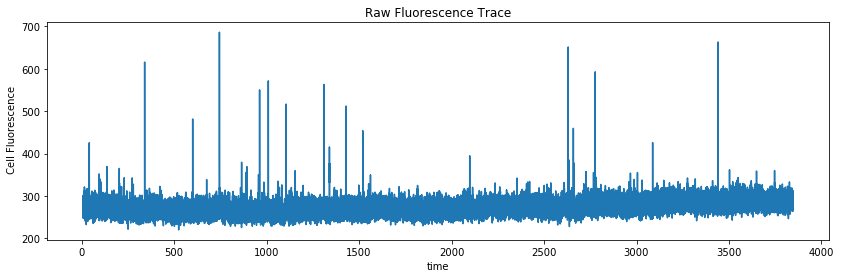

In [15]:
%matplotlib inline

plt.figure(figsize=(14,4))
plt.title("Raw Fluorescence Trace")
plt.xlabel("time")
plt.ylabel(" Cell Fluorescence")
plt.plot(time, trace[0])
plt.show()
